In [154]:
import pandas as pd
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas
from geopy.geocoders import Nominatim

## Geotagging the scraped Data

In [155]:
df = pd.read_csv('all_reviews.csv')
locations_df = pd.read_csv('locations_geotagged.csv')
beer_df = pd.read_csv('beer_deets.csv')

In [156]:
df

,beer_name,beer_rating,brewery_location,brewery_name,review_content,reviewer_name
0,St. Peter's Ruby Red Ale,3.3,"Bungay, Suffolk",St. Peter's Brewery,"Ruby color, offwhite coam. Aroma and taste: fl...",alex_leit
1,Shepherd Neame Spitfire (Bottle),2.2,"Faversham, Kent",Shepherd Neame,Disappointing show from the lads at ‘Britain’s...,shivermetimber.gray
2,Arbor Rocketman,3.8,"Bristol, Gloucestershire",Arbor Ales,"Puszka. Mętne o żółtym kolorze. Piana biała,ob...",MarcinG
3,Shepherd Neame India Pale Ale (Bottle),3.4,"Faversham, Kent",Shepherd Neame,Bottle. Amber with bronze color and white foam...,alex_leit
4,Shepherd Neame Christmas Ale,3.3,"Faversham, Kent",Shepherd Neame,Bottle. Aroma: English hops and malts with tof...,alex_leit
...,...,...,...,...,...,...
22609,Wasatch Devastator Double Bock,1.0,-2.4,Wasatch Brewery (CANarchy Craft Brewery Collec...,Not impressed. I guess I spoiled myself since ...,ResinousTamer56
22610,Left Hand White Russian Nitro,1.5,-1.8,Left Hand Brewing Company,Can 400ml (Systembolaget)\n\nGolden-amber colo...,TBone
22611,Malt Coast Farm Table Saison,0.8,-2.2,Malt Coast Brewery,Aroma is strong chemical.\nAppearance is cloud...,MrJamesMcEwan
22612,Wolters Pilsener,5.0,+2.4,Hofbrauhaus Wolters,Bestes Bier der Welt.\nKein Bier hat so einen ...,FlightTaps43


In [157]:
locations_df

,locations,latitude,longitude,country
0,"Bungay, Suffolk",52.456225,1.437341,United Kingdom
1,"Faversham, Kent",51.314409,0.891189,United Kingdom
2,"Bristol, Gloucestershire",51.852767,-2.255369,United Kingdom
3,"Round Rock, Texas",30.508235,-97.678893,United States of America
4,"Brooklyn, New York",40.650104,-73.949582,United States of America
...,...,...,...,...
2092,"Nürtingen, Baden-Württemberg",48.626585,9.336546,Germany
2093,"Oslo, Norway",59.913330,10.738970,Norway
2094,"Nagold, Baden-Württemberg",48.551240,8.723494,Germany
2095,"Hagen, North Rhine-Westphalia",51.358294,7.473296,Germany


In [158]:
geolocator = Nominatim(user_agent="None")

In [159]:
locations_new = pd.DataFrame(df.brewery_location[~df.brewery_location.isin(locations_df.locations)].unique(),columns=['locations'])
print(len(locations_new), "new locations to search for! Will take", len(locations_new)/2, "seconds to run.")

44 new locations to search for! Will take 22.0 seconds to run.


In [160]:
def tryconvert(x):
        try:
            return geolocator.geocode(x).latitude
        except:
            return None
    

In [161]:
def tryconvertlong(x):
        try:
            return geolocator.geocode(x).longitude
        except:
            return None

In [162]:
locations_new["latitude"] = locations_new.locations.apply(lambda x: tryconvert(x))

In [163]:
locations_new["longitude"] = locations_new.locations.apply(lambda x: tryconvertlong(x))

In [164]:
countries = []
for row in locations_new.index:
    try:
        loc = geolocator.reverse([locations_new.iloc[row,1],locations_new.iloc[row,2]], language='en')
        countries.append(loc.raw['address']['country'])
    except:
        countries.append(None)
        
    

In [165]:
locations_new['country'] = countries

In [166]:
locations_new

,locations,latitude,longitude,country
0,"Motten, Bavaria",50.397095,9.771776,Germany
1,"Beeston, Norfolk",52.708200,0.826452,United Kingdom
2,"Belsele, Belgium",51.157024,4.091775,Belgium
3,"Grossostheim, Bavaria",49.913254,9.068473,Germany
4,"Luckenwalde, Brandenburg",52.089740,13.162872,Germany
5,"Acaster Malbis, North Yorkshire",53.882606,-1.119775,United Kingdom
6,"Terra Alta, West Virginia",39.445709,-79.546565,United States of America
7,"Parsonburg, Maryland",39.307332,-76.098282,United States of America
8,"Strullendorf-Geisfeld, Bavaria",49.881021,11.013581,Germany
9,"Hamminkeln, North Rhine-Westphalia",51.730692,6.590865,Germany


In [167]:
locations_df = pd.concat([locations_df,locations_new])
locations_df.to_csv('locations_geotagged.csv',index=False)

## Deal with Non-English Descriptions

## Merging and cleaning

In [168]:
beer_df

,return_string,flag,type,abv,rb_overall_score,rb_style_score,rb_user_rating,rb_rating_number,name_found
0,St. Peter's Ruby Red Ale\n🇬🇧 Bitter - Ordinary...,🇬🇧,Bitter - Ordinary / Best,4.3,49,95,3.25,415.0,St. Peter's Ruby Red Ale
1,Shepherd Neame Spitfire (Bottle)\n🇬🇧 Bitter - ...,🇬🇧,Bitter - Ordinary / Best,4.5,34,59,3.05,1083.0,Shepherd Neame Spitfire (Bottle)
2,Arbor Rocketman\n🇬🇧 IPA • 6.0%\n95\n97\n3.74\n...,🇬🇧,IPA,6.0,95,97,3.74,59.0,Arbor Rocketman
3,Shepherd Neame India Pale Ale (Bottle)\n🇬🇧 IPA...,🇬🇧,IPA - English,6.1,46,47,3.22,420.0,Shepherd Neame India Pale Ale (Bottle)
4,Shepherd Neame Christmas Ale\n🇬🇧 Strong Ale - ...,🇬🇧,Strong Ale - English,7.0,45,46,3.18,409.0,Shepherd Neame Christmas Ale
...,...,...,...,...,...,...,...,...,...
12387,Yazoo Lake Dog Lager\n🇺🇸 Helles / Dortmunder E...,🇺🇸,Helles / Dortmunder Export,NaN,-,-,3.17,3.0,Yazoo Lake Dog Lager
12388,Schmitt Bräu Heller Bock\n🇩🇪 Bock - Heller Boc...,🇩🇪,Bock - Heller Bock / Maibock,0.0,-,-,3.44,7.0,Schmitt Bräu Heller Bock
12389,Robin Léa No.5\n🇨🇦 Saison / Farmhouse / Griset...,🇨🇦,Saison / Farmhouse / Grisette,NaN,-,-,4.40,3.0,Robin Léa No.5
12390,Slackwater Idleback Amber\n🇨🇦 Red Ale / Intl A...,🇨🇦,Red Ale / Intl Amber Ale,NaN,-,-,2.85,2.0,Slackwater Idleback Amber


In [169]:
# Creating DF with all details
df_all = pd.merge(df,locations_df,how='left',left_on='brewery_location',right_on='locations')
df_all = pd.merge(df_all, beer_df, how='left', left_on='beer_name',right_on='name_found')
df_all


,beer_name,beer_rating,brewery_location,brewery_name,review_content,reviewer_name,locations,latitude,longitude,country,return_string,flag,type,abv,rb_overall_score,rb_style_score,rb_user_rating,rb_rating_number,name_found
0,St. Peter's Ruby Red Ale,3.3,"Bungay, Suffolk",St. Peter's Brewery,"Ruby color, offwhite coam. Aroma and taste: fl...",alex_leit,"Bungay, Suffolk",52.456225,1.437341,United Kingdom,St. Peter's Ruby Red Ale\n🇬🇧 Bitter - Ordinary...,🇬🇧,Bitter - Ordinary / Best,4.3,49,95,3.25,415.0,St. Peter's Ruby Red Ale
1,Shepherd Neame Spitfire (Bottle),2.2,"Faversham, Kent",Shepherd Neame,Disappointing show from the lads at ‘Britain’s...,shivermetimber.gray,"Faversham, Kent",51.314409,0.891189,United Kingdom,Shepherd Neame Spitfire (Bottle)\n🇬🇧 Bitter - ...,🇬🇧,Bitter - Ordinary / Best,4.5,34,59,3.05,1083.0,Shepherd Neame Spitfire (Bottle)
2,Arbor Rocketman,3.8,"Bristol, Gloucestershire",Arbor Ales,"Puszka. Mętne o żółtym kolorze. Piana biała,ob...",MarcinG,"Bristol, Gloucestershire",51.852767,-2.255369,United Kingdom,Arbor Rocketman\n🇬🇧 IPA • 6.0%\n95\n97\n3.74\n...,🇬🇧,IPA,6.0,95,97,3.74,59.0,Arbor Rocketman
3,Shepherd Neame India Pale Ale (Bottle),3.4,"Faversham, Kent",Shepherd Neame,Bottle. Amber with bronze color and white foam...,alex_leit,"Faversham, Kent",51.314409,0.891189,United Kingdom,Shepherd Neame India Pale Ale (Bottle)\n🇬🇧 IPA...,🇬🇧,IPA - English,6.1,46,47,3.22,420.0,Shepherd Neame India Pale Ale (Bottle)
4,Shepherd Neame Christmas Ale,3.3,"Faversham, Kent",Shepherd Neame,Bottle. Aroma: English hops and malts with tof...,alex_leit,"Faversham, Kent",51.314409,0.891189,United Kingdom,Shepherd Neame Christmas Ale\n🇬🇧 Strong Ale - ...,🇬🇧,Strong Ale - English,7.0,45,46,3.18,409.0,Shepherd Neame Christmas Ale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22833,Wasatch Devastator Double Bock,1.0,-2.4,Wasatch Brewery (CANarchy Craft Brewery Collec...,Not impressed. I guess I spoiled myself since ...,ResinousTamer56,-2.4,48.800511,9.991238,Germany,Wasatch Devastator Double Bock\n🇺🇸 Bock - Dopp...,🇺🇸,Bock - Doppelbock,8.0,66,68,3.37,349.0,Wasatch Devastator Double Bock
22834,Left Hand White Russian Nitro,1.5,-1.8,Left Hand Brewing Company,Can 400ml (Systembolaget)\n\nGolden-amber colo...,TBone,-1.8,48.780981,10.037026,Germany,Left Hand White Russian Nitro\n🇺🇸 Stout - Impe...,🇺🇸,Stout - Imperial Flavored,8.9,54,2,3.24,55.0,Left Hand White Russian Nitro
22835,Malt Coast Farm Table Saison,0.8,-2.2,Malt Coast Brewery,Aroma is strong chemical.\nAppearance is cloud...,MrJamesMcEwan,-2.2,48.793281,9.967117,Germany,Malt Coast Farm Table Saison\n🇬🇧 Saison / Farm...,🇬🇧,Saison / Farmhouse / Grisette,3.6,-,-,2.85,7.0,Malt Coast Farm Table Saison
22836,Wolters Pilsener,5.0,+2.4,Hofbrauhaus Wolters,Bestes Bier der Welt.\nKein Bier hat so einen ...,FlightTaps43,+2.4,NaN,9.991238,NaN,Wolters Pilsener\n🇩🇪 Pilsener / Pils / Pilsner...,🇩🇪,Pilsener / Pils / Pilsner,4.9,10,28,2.63,173.0,Wolters Pilsener


In [170]:
df_all.drop(["locations","return_string","name_found"],axis=1,inplace=True)

In [171]:
# df_all[len(df_all['brewery_location'].str)<4]

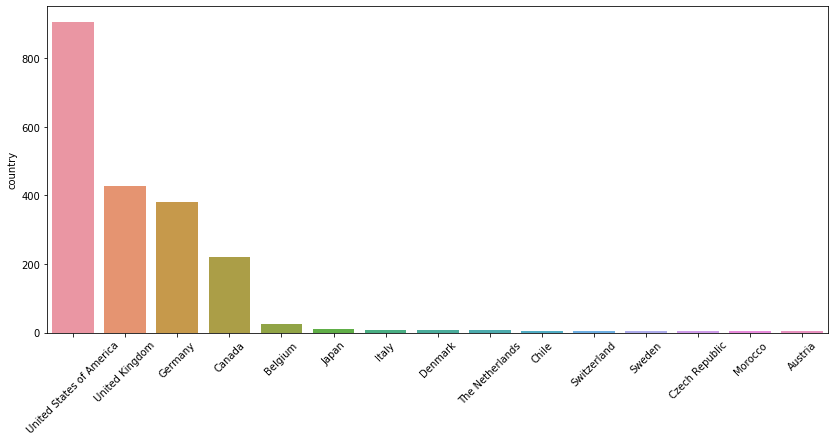

In [172]:
# Where the beers are from
plt.figure(figsize=(14,6))
ax = sns.barplot(x=locations_df.country.value_counts().head(15).index,y=locations_df.country.value_counts().head(15))
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

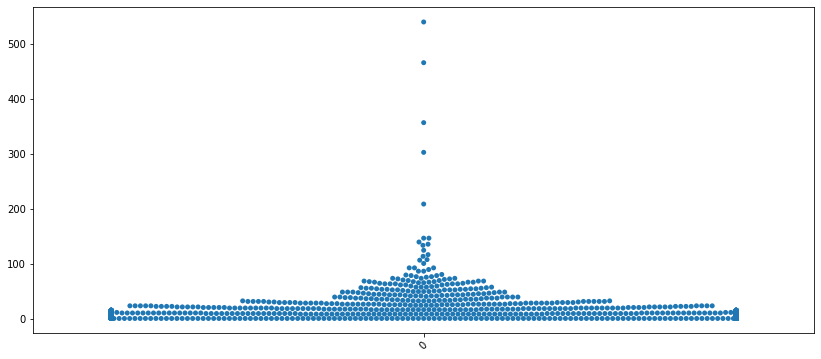

In [173]:
plt.figure(figsize=(14,6))
ax = sns.swarmplot(data = df.groupby("reviewer_name").review_content.count())
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

In [174]:
df.groupby("reviewer_name").review_content.count()

reviewer_name
101poodles       7
151rum           4
17Beer          25
2OLD4BS         22
2mutchbeer41     2
                ..
zizzybalubba     6
zombywoof        1
zoucrew102      68
zvikar          11
zvsn            29
Name: review_content, Length: 2370, dtype: int64

In [175]:
plt.figure(figsize=(12,12))
ax = sns.scatterplot(x=)
plt.show()

SyntaxError: invalid syntax (<ipython-input-175-139d7ca9f737>, line 2)